# Level 3, Task 2: Email Spam Detection: Natural Language Processing (NLP) Classification

## 1.1)Introduction

In the digital age, email remains one of the most common modes of communication for both personal and professional use. However, the widespread use of email has also led to an increase in spam messages, which pose risks such as phishing attacks, data theft, and productivity loss. To address this, machine learning and Natural Language Processing (NLP) techniques have become powerful tools in detecting and filtering spam automatically.
This project leverages NLP-based text processing and classification algorithms to distinguish between spam and ham (legitimate) emails. By converting text data into meaningful numerical representations and training classification models, the project demonstrates how data science can enhance cybersecurity and communication efficiency.

## 1.2)Problem Statement

Spam emails continue to be a major issue in digital communication, often overwhelming users with unwanted content and malicious intent. Traditional rule-based filters are limited in their ability to adapt to evolving spam tactics and diverse writing styles. This creates a need for a more intelligent, data-driven system that can learn from patterns within text and accurately classify new incoming emails.
The challenge lies in processing large amounts of unstructured text data, extracting relevant linguistic features, and applying the right classification algorithms to ensure high accuracy while minimizing false positives.

## 1.3)Objective

The primary objective of this project is to develop a machine learning model that automatically detects and classifies emails as spam or non-spam using NLP techniques.
Specific goals include:

* Preprocess email text data through tokenization, stopword removal, and vectorization (i.e, CountVectorizer).

* Implement and compare multiple classification models such as Random Forest, Logistic Regression, or Support Vector Machines.

* Evaluate model performance using metrics such as accuracy, precision, recall, and confusion matrix.


## 2)Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

## 3)Loading the dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 4)Check the data

In [ ]:
# checking the shape of the dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 5572 rows and 2 columns


In [ ]:
# preview of the first 5 rows
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# preview of the last 5 rows
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


both colunms are object (string) type

## 5)Data Cleaning

In [ ]:
# checking for missing values
df.isnull().sum()

,0
Category,0
Message,0


there is no presence of missing values.

In [ ]:
# checking for duplicated rows
df.duplicated().sum()

np.int64(415)

there are 415 duplicated rows.

In [ ]:
# removing the duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
# confirming the we don't have any duplicated rows
df.duplicated().any()

np.False_

we can proceed because there are no duplicated rows

## 6)Exploratory Data Analysis

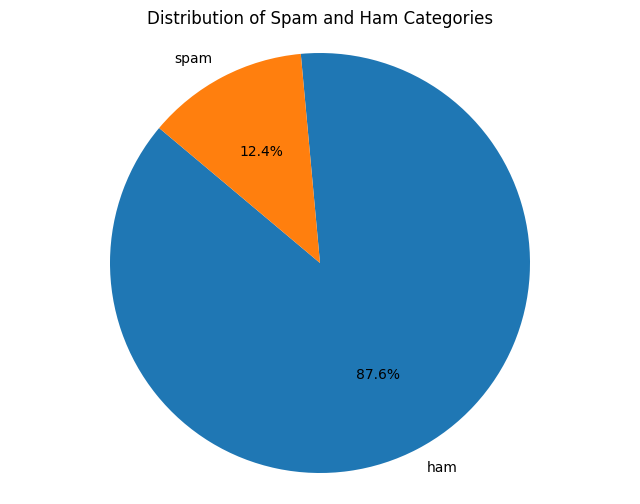

In [ ]:
# Calculate the count of each label
category_counts =df['Category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Ham Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

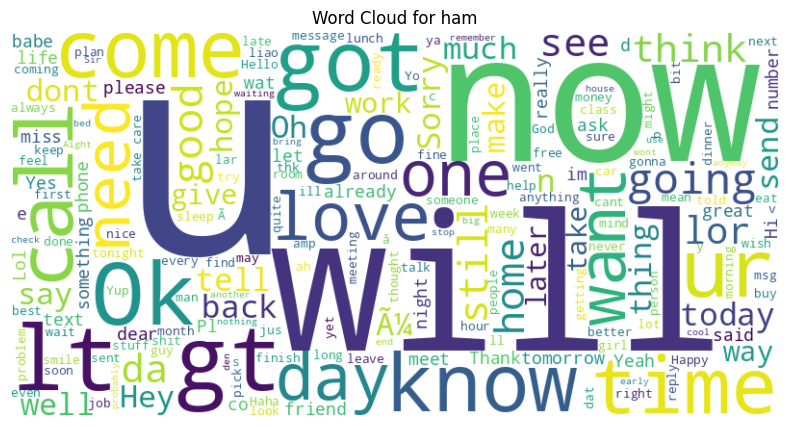

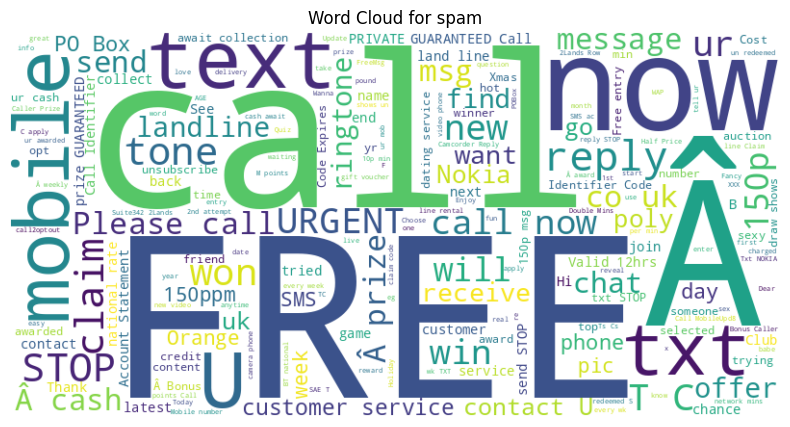

In [ ]:
# Text Visualization
# we are going to iterate through the unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    category_data = df[df['Category'] == category]

    # Concatenate the text from the 'Message' column
    text = ' '.join(category_data['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()

## 7)Feature Engineering

### 7.1)Label Encoding

In [ ]:
# Encoding the Category column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [ ]:
# checking for changes in the category column. We expect the categorical data to have changed to numerical
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 7.2)LowerCasting Text

In [ ]:
# Lower casing Text
df['Message'] = df['Message'].str.lower()

In [ ]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# removing extra white spaces from the message column
df['Message'] = df['Message'].str.strip()
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


### 7.3)Remove HTML tags


In [ ]:
# remove HTML tags from Message column
from bs4 import BeautifulSoup
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()
df['Message'] = df['Message'].apply(lambda x: remove_html_tags(x))

In [ ]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


## 7.4)Remove URLs

In [ ]:
# remove URLS using regular expressions
import re
def remove_urls(text):
    return re.sub(r'https\S+|www\S+','', text)

# Apply the function to the message column
df['Message'] = df['Message'].apply(remove_urls)

In [ ]:
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


### 7.5)Remove puntuation marks

In [ ]:
# remove puntuation marks
import string
string.punctuation

# define the punctuation characters to remove
punctuation = string.punctuation

In [ ]:
# Function to remove punctuation characters from messages column
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', punctuation))

# Apply the above function to the messages column
df['Message'] = df['Message'].apply(remove_punctuation)

In [ ]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


### 7.6)remove special characters

In [ ]:
# remove special characters from Message column
def remove_special_characters(text):
    # define pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]' # matches any character that is not alphanumeric or whitespace
    # replace special characters with an empty string
    return re.sub(pattern, '', text)

# apply the function to the messages column
df['Message'] = df['Message'].apply(remove_special_characters)

In [ ]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


### 7.7)Remove numeric values



In [ ]:
# Remove numeric values from message column
def remove_numeric_values(text):
    # define pattern to match numeric values
    pattern = r'\d+'
    # replace numeric values with an empty string
    return re.sub(pattern, '', text)

# apply the function to the messages column
df['Message'] = df['Message'].apply(remove_numeric_values)

In [ ]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


### 7.8)remove non-aplha numeric

In [ ]:
# remove non-aplha numeric
def remove_non_alphanumeric(text):
    # define pattern to match non-alphanumeric characters
    pattern = r'[^a-zA-Z0-9\s]'
    # replace non-alphanumeric values with an empty string
    return re.sub(pattern, '', text)

# apply the function to the messages column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [ ]:
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


### 7.9)Handling Chatwoords

In [ ]:
# Handling chat words
# Define a dictionary of chat word mappings
chat_words = {
    'AFAIK': "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
     "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
     "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
     "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [ ]:
# function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)
# apply the above function to message column
df['Message'] = df['Message'].apply(replace_chat_words)

### 7.10)Handling stopwords

Stop words are commonly used words excluded from text processing tasks like natural language processing and search engine algorithms. These words, such as "the," "and" and "is," are considered insignificant because they do not carry much meaning and occur frequently in the English language.

In [ ]:
# Handling Stopwords
import nltk
from nltk.corpus import stopwords
# download NLTK stopwords corpus
nltk.download('stopwords')
# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

#Function to remove stop words from message column
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Applying the above function to message column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


### 7.11) Remove emoji

In [ ]:
# remove emoji from message column
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 19.1 MB/s eta 0:00:00


In [ ]:
import emoji
def remove_emoji(text):
    return emoji.demojize(text)

# Apply the above function to the messages column
df['Message'] = df['Message'].apply(remove_emoji)

### 7.12)Stemming
Stemming is a text processing technique used in natural language processing (NLP) to reduce words to their root or base form, known as the stem. The goal of stemming is to normalize words with similar meanings so that variations of the same word are treated as identical. This helps improve text analysis and information retrieval tasks by reducing the complexity of the vocabulary.¶


For example, stemming would convert words like "running," "runs," and "ran" to the common stem "run." Similarly, "fishes" and "fishing" would both be stemmed to "fish." While stemming can sometimes result in non-real words, it is a simple and efficient method for preprocessing text data in NLP tasks.¶


In [ ]:
# import library
from nltk.stem import PorterStemmer

#initialize the porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

## 8)Data Modelling

### 8.1)Text vectorization
Text vectorization in Python involves converting raw textual data into numerical representations that machine learning algorithms can understand and process. This is a fundamental step in many Natural Language Processing (NLP) tasks.


In [ ]:
# import library
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer in Python's scikit-learn library is a tool used in Natural Language Processing (NLP) to convert a collection of text documents into a numerical matrix of token (word or n-gram) counts. This process transforms unstructured text data into a format suitable for machine learning algorithm

In [ ]:
# initialize countVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

### 8.2)Spliting the data into train and test data

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8.3)Initialize, fit, and predict the models

#### 8.3.1)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# logistic regresion with tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

#### 8.3.2)Support Vector Machine (SVM)




In [ ]:
from sklearn.svm import SVC
# SVM with tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

#### 8.3.3)Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision tree with tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

#### 8.3.4)Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest with tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

### 8.4)Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#### 8.4.1)Logistic Regression

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

In [ ]:
print("Logistic Regression:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy}\nThe Precision Score is {lr_precision}\nThe Recall Score is {lr_recall}")
print(f"The Confusion matrix is \n{lr_conf_matrix}")
print("\n")

Logistic Regression:
The accuracy score of Logistic Regression is 0.9718992248062015
The Precision Score is 0.9724528699938659
The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[895   1]
 [ 28 108]]




#### 8.4.2)Support Vector Machine (SVM)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

In [ ]:
print("SVM:")
print(f"The accuracy score of SVC is {svm_accuracy} \nThe Precision Score is {svm_precision}\nThe Recall Score is {svm_recall}")
print(f"The Confusion matrix is \n{svm_conf_matrix}")
print("\n")

SVM:
The accuracy score of SVC is 0.8943798449612403 
The Precision Score is 0.9058351652589764
The Recall Score is 0.8943798449612403
The Confusion matrix is 
[[896   0]
 [109  27]]




#### 8.4.3)Decision Trees

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

In [ ]:
print("Decision Trees:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy}\nThe Precision Score is {dt_precision}\nThe Recall Score is {dt_recall}")
print(f"The Confusion matrix is \n{dt_conf_matrix}")
print("\n")

Decision Trees:
The accuracy score of Decision Tree classifier is 0.9534883720930233
The Precision Score is 0.9518701628164753
The Recall Score is 0.9534883720930233
The Confusion matrix is 
[[883  13]
 [ 35 101]]




8.4.4)Random Forest

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [ ]:
print("Random Forests:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy} \nThe Precision Score is {rf_precision}\nThe Recall Score is {rf_recall}")
print(f"The Confusion matrix is \n{rf_conf_matrix}")
print("\n")

Random Forests:
The accuracy score of Random Forest classifier is 0.9166666666666666 
The Precision Score is 0.9239646978954514
The Recall Score is 0.9166666666666666
The Confusion matrix is 
[[896   0]
 [ 86  50]]




# 9)Conclusion


Logistic regression has the highest accuracy score, which is 97.19%. Therefore, it's the preferred model to use.